Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:

1. Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).

2. Load the dataset into a Pandas dataframe.

3. Split the dataset into features and target variables.

4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

5. Implement PCA on the preprocessed dataset using the scikit-learn library.

6. Determine the optimal number of principal components to retain based on the explained variance ratio.

7. Visualise the results of PCA using a scatter plot.

8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

9. Interpret the results of PCA and clustering analysis.

Deliverables:

1. Jupyter notebook containing the code for the PCA implementation.

2. A report summarising the results of PCA and clustering analysis.

3. Scatter plot showing the results of PCA.

4. A table showing the performance metrics for the clustering algorithm.

Additional Information:

1. You can use the python programming language.

2. You can use any other machine learning libraries or tools as necessary.

3. You can use any visualisation libraries or tools as necessary.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# load dataset into pandas dataframe
df = pd.read_csv('wine.data')

In [2]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
with open('wine.names','r') as f:
    a = f.read()
    print(a)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [5]:
df.columns = ['target','alcohol','malic_acid','ash','alcalinity','magnesium','tot_phenols',
              'flavanoids','non_flavanoids','Proanthocyanins','color_intensity', 'hue','OD280/OD315','Proline']

In [6]:
df.head()

,target,alcohol,malic_acid,ash,alcalinity,magnesium,tot_phenols,flavanoids,non_flavanoids,Proanthocyanins,color_intensity,hue,OD280/OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           177 non-null    int64  
 1   alcohol          177 non-null    float64
 2   malic_acid       177 non-null    float64
 3   ash              177 non-null    float64
 4   alcalinity       177 non-null    float64
 5   magnesium        177 non-null    int64  
 6   tot_phenols      177 non-null    float64
 7   flavanoids       177 non-null    float64
 8   non_flavanoids   177 non-null    float64
 9   Proanthocyanins  177 non-null    float64
 10  color_intensity  177 non-null    float64
 11  hue              177 non-null    float64
 12  OD280/OD315      177 non-null    float64
 13  Proline          177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
malic_acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
alcalinity,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
tot_phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
non_flavanoids,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


In [9]:
df.isna().sum()

target             0
alcohol            0
malic_acid         0
ash                0
alcalinity         0
magnesium          0
tot_phenols        0
flavanoids         0
non_flavanoids     0
Proanthocyanins    0
color_intensity    0
hue                0
OD280/OD315        0
Proline            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [12]:
X.head()

,alcohol,malic_acid,ash,alcalinity,magnesium,tot_phenols,flavanoids,non_flavanoids,Proanthocyanins,color_intensity,hue,OD280/OD315,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity,magnesium,tot_phenols,flavanoids,non_flavanoids,Proanthocyanins,color_intensity,hue,OD280/OD315,Proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)

In [16]:
X_pca

array([[ 2.23024297e+00,  3.02312771e-01, -2.03292031e+00, ...,
        -9.27614800e-01,  7.97243288e-02,  1.02647007e+00],
       [ 2.53192196e+00, -1.06225676e+00,  9.76724345e-01, ...,
         5.57251638e-01,  4.32349703e-01, -3.35611190e-01],
       [ 3.75467731e+00, -2.80530871e+00, -1.80370131e-01, ...,
         1.00108645e-01, -3.64924495e-01,  6.46847381e-01],
       ...,
       [-2.69214577e+00, -2.73987492e+00, -9.23111537e-01, ...,
         2.72353459e-01,  6.77067043e-01,  5.26420798e-02],
       [-2.39839363e+00, -2.27992875e+00, -5.37481419e-01, ...,
         1.18143395e+00,  6.09200022e-01,  3.89103705e-01],
       [-3.21585159e+00, -2.74059303e+00,  1.01246947e+00, ...,
         3.01225480e-01, -3.70167794e-03, -2.95757065e-01]])

In [17]:

print(pca.explained_variance_ratio_)

[0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367
 0.04246014 0.02697991]


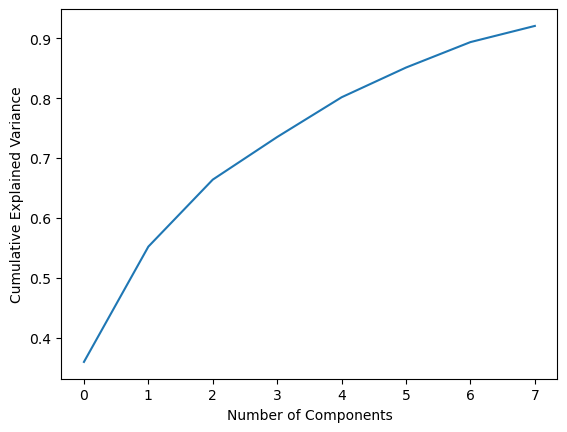

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

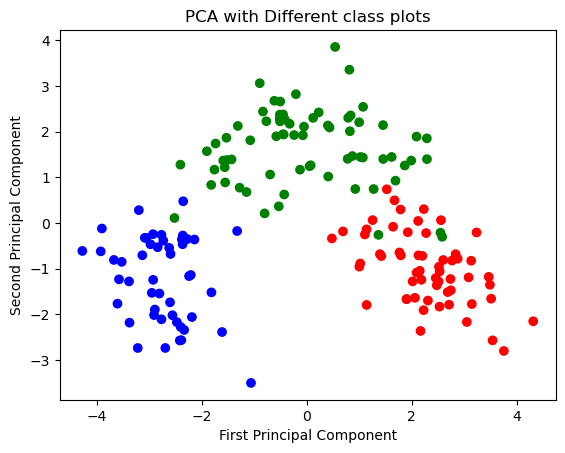

In [19]:
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_pca[:,0], X_pca[:,1],c=Y['target'].map(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Different class plots')
plt.show()

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [22]:
preds = kmeans.predict(X_pca)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

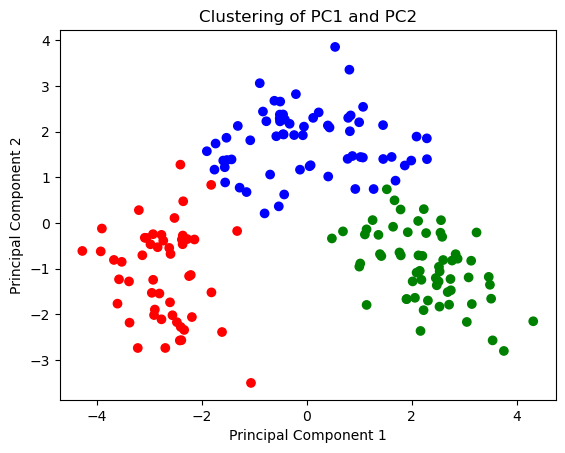

In [23]:
colors2 = {0:'red', 1:'green', 2:'blue'}
pred_colors = [colors2[item] for item in preds]
plt.scatter(X_pca[:,0],X_pca[:,1],c=pred_colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PC1 and PC2')
plt.show()

# Interpretation of Clustering results
# K-means Clustering helped to identify pattern without the target variables.
# Actual Clusters and Predicted clusters are very similar excluding some exceptions.
# PC1 and PC2 are enough to explore this data